In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import torch
from transformers import BertTokenizer, BertModel
from keras import losses

C:\Users\anjal\anaconda3\New folder\envs\renv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import pandas as pd

# Load the file without headers
data_train_X = pd.read_csv("readable_datasets/amino_acids_train.txt", header=None)

# Print the first few rows to check
print(data_train_X.head())

                                                   0
0  F D Y Q T V Y F A N Q Y G L R T I E L G E S E ...
1  R P E S E L I R Q S W R V V S R S P L E H G T ...
2  M K I A I L G A G C Y R T H A A A G I T N F M ...
3  R R T V P R G T L R K I I K K H K P H L R L A ...
4  Q V E I S X A E W D V X N I I W D K K S V S A ...


In [9]:
data_train_y = pd.read_csv("readable_datasets/pss_train.txt", header=None)

In [10]:
# Combine X and y into a single DataFrame for easier manipulation
data = pd.concat([data_train_X, data_train_y], axis=1)
data.columns = [f"feature_{i}" for i in range(data_train_X.shape[1])] + ["dssp8"]

In [13]:
# Print the first few rows to check
print(data.head())

                                           feature_0  \
0  F D Y Q T V Y F A N Q Y G L R T I E L G E S E ...   
1  R P E S E L I R Q S W R V V S R S P L E H G T ...   
2  M K I A I L G A G C Y R T H A A A G I T N F M ...   
3  R R T V P R G T L R K I I K K H K P H L R L A ...   
4  Q V E I S X A E W D V X N I I W D K K S V S A ...   

                                               dssp8  
0  L L L L E E E L S L S E E E E E E E L S L L S ...  
1  L L S H H H H H H H H H H H H T S H H H H H H ...  
2  L E E E E E L L L L S H H H H H H L L L L L H ...  
3  L L L L L H H H H H H H H H H H L T T L L L L ...  
4  L L L L L H H H H H H H H H H H H S S S E E H ...  


In [21]:
# Remove whitespace characters and flatten DSSP8 labels
dssp8 = ''.join(data['dssp8'].values).replace(' ', '')
counts = Counter(dssp8)

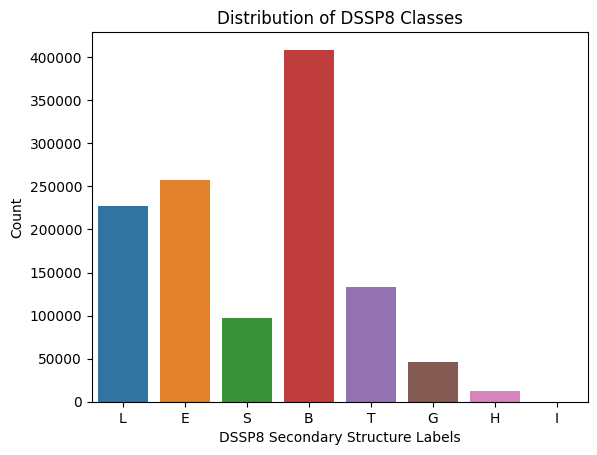

In [22]:
# Plot the corrected distribution
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('DSSP8 Secondary Structure Labels')
plt.ylabel('Count')
plt.title('Distribution of DSSP8 Classes')
plt.show()

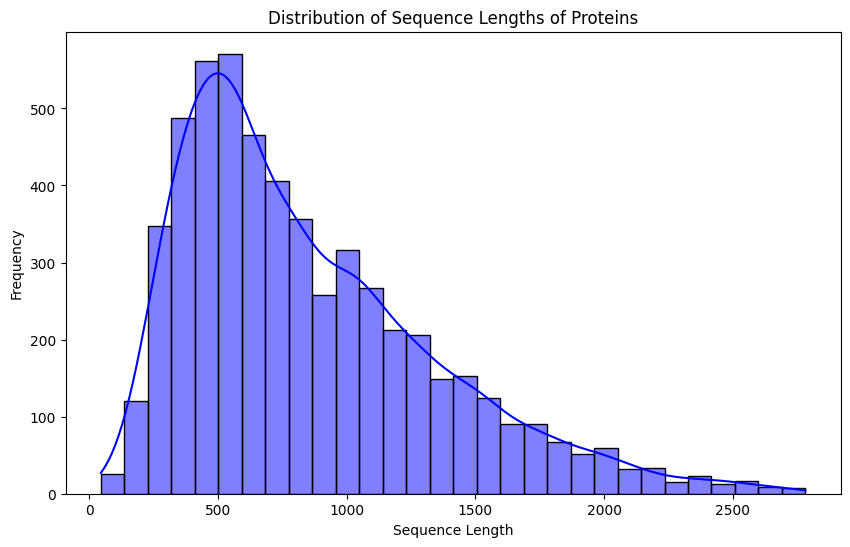

In [8]:
# Generate protein sequences by concatenating non-null features
data['sequence'] = data.apply(lambda row: ''.join(row.dropna().astype(str)), axis=1)

# Calculate the length of each protein sequence
sequence_lengths = data['sequence'].apply(len)

# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=30, kde=True, color="blue")
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths of Proteins')
plt.show()

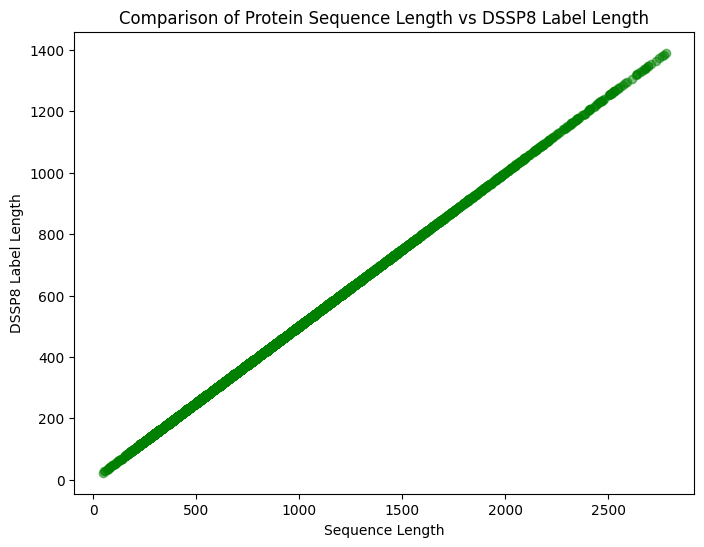

In [11]:
# Calculate the length of each sequence and corresponding DSSP8 label
sequence_lengths = data['sequence'].apply(len)
dssp8_lengths = data['dssp8'].apply(len)

# Scatter plot comparing sequence length and DSSP8 label length
plt.figure(figsize=(8, 6))
plt.scatter(sequence_lengths, dssp8_lengths, alpha=0.5, color="green")
plt.xlabel('Sequence Length')
plt.ylabel('DSSP8 Label Length')
plt.title('Comparison of Protein Sequence Length vs DSSP8 Label Length')
plt.show()